In [1]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from importlib import reload
from kmeans import *
from tf_idf import *
from data import *
import pandas as pd
import numpy as np
from rfm import *
from graph import *
from evaluation import *

In [2]:
df = load_data()

In [3]:
stock_rfm = rfm(df,model_type='StockID')

In [4]:
stock_rfm = rfm_transform(stock_rfm)
stock_rfm.head(10)

,CustomerID,Frequency,Recency,Amount,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,cate_7,cate_8,cate_9
867,13953,5,1,5.0,5.0,1.0,4.0,5.0,2.0,5.0,1.0,1.0,1.0
2088,17594,2,4,4.0,1.0,4.0,1.0,3.0,5.0,3.0,1.0,4.0,1.0
822,17888,5,2,3.0,5.0,3.0,1.0,4.0,5.0,2.0,4.0,4.0,1.0
1555,13038,4,4,3.0,1.0,4.0,1.0,3.0,1.0,3.0,1.0,4.0,1.0
4203,15699,2,2,2.0,3.0,1.0,3.0,4.0,3.0,4.0,1.0,4.0,1.0
3221,13159,4,1,4.0,5.0,4.0,2.0,5.0,3.0,4.0,4.0,4.0,1.0
3130,13928,4,1,2.0,1.0,2.0,5.0,2.0,5.0,2.0,3.0,4.0,1.0
3615,14815,3,3,3.0,1.0,3.0,5.0,4.0,5.0,2.0,3.0,4.0,1.0
3016,15795,1,4,3.0,4.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0
2119,13918,2,3,4.0,2.0,4.0,2.0,3.0,1.0,3.0,1.0,4.0,1.0


In [5]:
matrix = rfm_matrix(stock_rfm, model_type=1)
sse, sscore, test_range = kmeans(matrix)

Clusters = 2 ,Silhouette Score = 0.23157
Clusters = 3 ,Silhouette Score = 0.20039
Clusters = 4 ,Silhouette Score = 0.19896
Clusters = 5 ,Silhouette Score = 0.19936
Clusters = 6 ,Silhouette Score = 0.19624
Clusters = 7 ,Silhouette Score = 0.1917
Clusters = 8 ,Silhouette Score = 0.18425
Clusters = 9 ,Silhouette Score = 0.16191
Clusters = 10 ,Silhouette Score = 0.15675
Clusters = 11 ,Silhouette Score = 0.15809
Clusters = 12 ,Silhouette Score = 0.16193
Clusters = 13 ,Silhouette Score = 0.16593
Clusters = 14 ,Silhouette Score = 0.16573


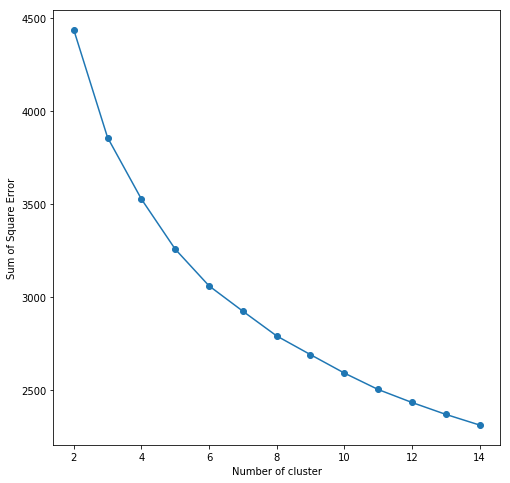

In [6]:
# Plot elbow method
plt.figure(figsize=(8, 8))
plt.plot(list(test_range), sse, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Sum of Square Error')

# Display the Silhouette score
for n_cluster, score in sscore.items():
    print("Clusters = {}".format(n_cluster),",Silhouette Score = {}".format(score))

In [7]:
clusters = kmeans(matrix = matrix, cluster_num = 5)
stock_rfm = rfm_write_back(stock_rfm,clusters) 
stock_rfm.head(10)

,CustomerID,Frequency,Recency,Amount,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,cate_7,cate_8,cate_9,Cluster
867,13953,5,1,5.0,5.0,1.0,4.0,5.0,2.0,5.0,1.0,1.0,1.0,3
2088,17594,2,4,4.0,1.0,4.0,1.0,3.0,5.0,3.0,1.0,4.0,1.0,4
822,17888,5,2,3.0,5.0,3.0,1.0,4.0,5.0,2.0,4.0,4.0,1.0,1
1555,13038,4,4,3.0,1.0,4.0,1.0,3.0,1.0,3.0,1.0,4.0,1.0,4
4203,15699,2,2,2.0,3.0,1.0,3.0,4.0,3.0,4.0,1.0,4.0,1.0,3
3221,13159,4,1,4.0,5.0,4.0,2.0,5.0,3.0,4.0,4.0,4.0,1.0,2
3130,13928,4,1,2.0,1.0,2.0,5.0,2.0,5.0,2.0,3.0,4.0,1.0,1
3615,14815,3,3,3.0,1.0,3.0,5.0,4.0,5.0,2.0,3.0,4.0,1.0,1
3016,15795,1,4,3.0,4.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,3
2119,13918,2,3,4.0,2.0,4.0,2.0,3.0,1.0,3.0,1.0,4.0,1.0,4


In [8]:
n_attributes = len(stock_rfm.columns) - 5
customer_clustering = df_for_chart(stock_rfm, n_attributes)
display(customer_clustering)

,Sum $,Med. $,Size,Med. Visit,Median $ per Visit,cate_1,cate_1 mean,cate_1 std,cate_2,cate_2 mean,...,cate_6 std,cate_7,cate_7 mean,cate_7 std,cate_8,cate_8 mean,cate_8 std,cate_9,cate_9 mean,cate_9 std
Cluster,,,,,,,,,,,,,,,,,,,,,
3,1225.0,2.0,623,2,1.0,168.000000,3.303371,1.165077,95.265306,1.873194,...,0.667783,136.000000,2.674157,1.241894,115.510204,2.271268,0.987202,179.755102,3.534510,1.419316
4,2864.0,3.0,858,3,1.0,51.326816,1.713287,1.136114,104.050279,3.473193,...,0.903804,50.663408,1.691142,1.134926,81.634078,2.724942,1.286059,87.011173,2.904429,1.395198
1,2236.0,4.0,574,4,1.0,84.078712,3.275261,1.549704,98.568873,3.839721,...,0.678038,96.377460,3.754355,1.135708,100.670841,3.921603,1.013388,57.737030,2.249129,1.294167
2,4706.0,5.0,1047,5,1.0,78.623034,3.533906,1.481031,99.213770,4.459408,...,0.696149,82.426689,3.704871,1.437592,97.407565,4.378223,0.795296,51.232469,2.302770,1.168278
0,1937.0,1.0,1220,2,1.0,199.277233,3.163934,0.976449,100.567888,1.596721,...,0.694150,197.057305,3.128689,1.020606,122.870418,1.950820,0.971330,236.035106,3.747541,1.155260


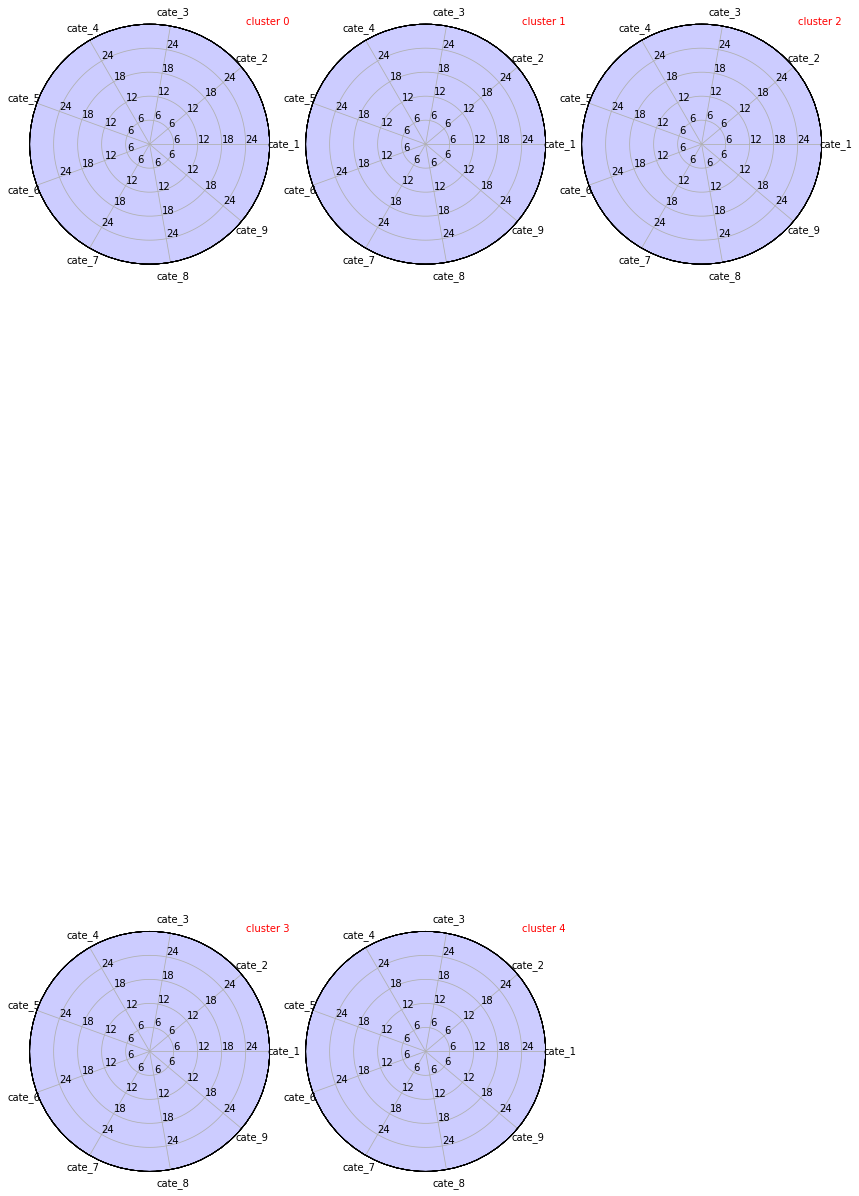

In [9]:
n_clusters = len(customer_clustering.index)
radar_chart(customer_clustering, n_clusters, n_attributes)

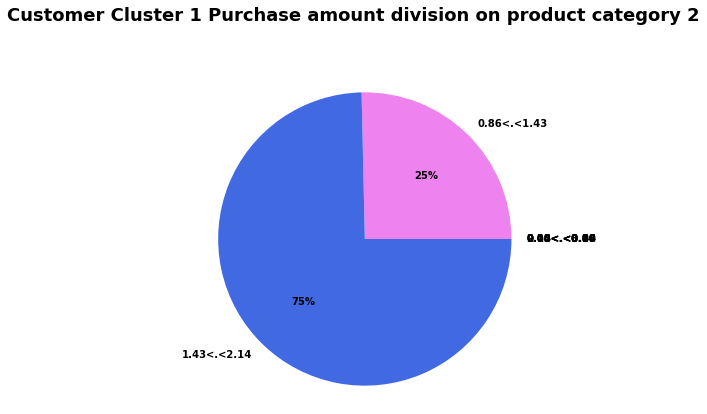

In [10]:
pie_chart(stock_rfm, 1, 2)